# CO2 concentration in the atmosphere since 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import datetime

The data has been loaded from the available from the Web site of the Scripps Institute. \
The data selected contains the weekly frequency and has been downloaded from https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html on the 16th of January 2024.

In [2]:
import os
os.chdir(os.getcwd())
data_url = "../Source/20240116_weekly_in_situ_co2_mlo.csv"

When opening the CSV file the below message is dispalyed and we can see that the data is loaded from the line 45 without any header. \
We therefore skip the first 44 rows using `skiprows=44`.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=44,header = None)
raw_data

,0,1
0,1958-03-29,316.19
1,1958-04-05,317.31
2,1958-04-12,317.69
3,1958-04-19,317.58
4,1958-04-26,316.48
...,...,...
3353,2023-12-02,420.28
3354,2023-12-09,421.23
3355,2023-12-16,422.57
3356,2023-12-23,422.06


First we are checking if there are any data missing.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

,0,1


There isn't any missing data. \
We are naming the columns to get it more readable.

In [5]:
raw_data.columns = ["date","co2_concentration"]
raw_data

,date,co2_concentration
0,1958-03-29,316.19
1,1958-04-05,317.31
2,1958-04-12,317.69
3,1958-04-19,317.58
4,1958-04-26,316.48
...,...,...
3353,2023-12-02,420.28
3354,2023-12-09,421.23
3355,2023-12-16,422.57
3356,2023-12-23,422.06


In [6]:
raw_data.dtypes

date                  object
co2_concentration    float64
dtype: object

We can see that the data type of the column "data" is not defined as a period and we are updating it to be sure that it is going to be treated appropriately.

In [8]:
raw_data.date = pd.to_datetime(raw_data.date,format='%Y-%m-%d')
raw_data.dtypes

date                 datetime64[ns]
co2_concentration           float64
dtype: object

We now change the index and sort by date to make sure that it is effectively ordered correctly.

In [9]:
raw_data["date_index"] = pd.to_datetime(raw_data.date,format='%Y-%m-%d')
sorted_data = raw_data.set_index("date_index").sort_index().drop(['date'],axis=1)
sorted_data

,co2_concentration
date_index,
1958-03-29,316.19
1958-04-05,317.31
1958-04-12,317.69
1958-04-19,317.58
1958-04-26,316.48
...,...
2023-12-02,420.28
2023-12-09,421.23
2023-12-16,422.57


We are now plotting all the values into a graph.

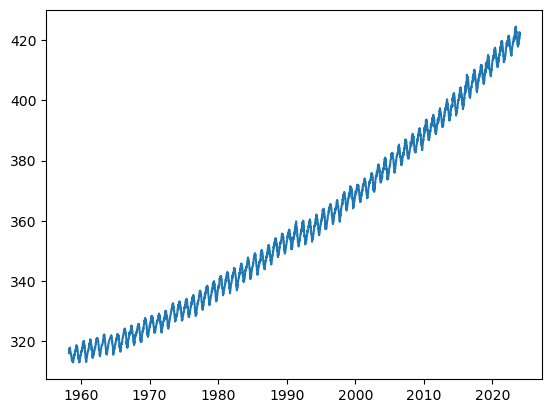

In [10]:
fig, ax = plt.subplots()
ax.plot(sorted_data.index,sorted_data["co2_concentration"])
plt.show()

We are creating 2 new dataframes taking the average per month and average per year. We are plotting also those 2 new dataframes.

In [11]:
sorted_data_bymonth = sorted_data.resample("M").mean()
sorted_data_bymonth

,co2_concentration
date_index,
1958-03-31,316.1900
1958-04-30,317.2650
1958-05-31,317.5000
1958-06-30,NaN
1958-07-31,315.6875
...,...
2023-08-31,419.6225
2023-09-30,418.1920
2023-10-31,418.5975


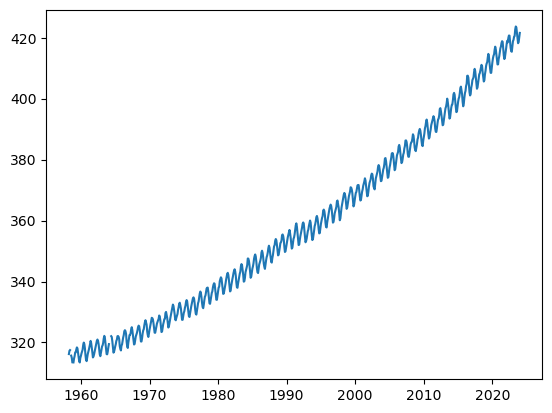

In [12]:
fig, ax = plt.subplots()
ax.plot(sorted_data_bymonth.index,sorted_data_bymonth["co2_concentration"])
plt.show()

In [13]:
sorted_data_byyear = sorted_data.resample("Y").mean()
sorted_data_byyear

,co2_concentration
date_index,
1958-12-31,315.474000
1959-12-31,315.945417
1960-12-31,316.898868
1961-12-31,317.634038
1962-12-31,318.597708
...,...
2019-12-31,411.417500
2020-12-31,413.964902
2021-12-31,416.086346


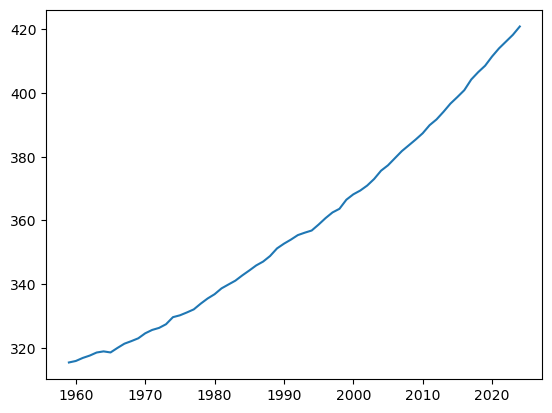

In [14]:
fig, ax = plt.subplots()
ax.plot(sorted_data_byyear.index,sorted_data_byyear["co2_concentration"])
plt.show()

We can see that the result per month is very close to the curve obtained per week but also that when we look at the year we are leaving the frequency model and are approaching to a line.
We are now comparing the result for multiple cases to see how the plots are evovling with different grouping. 

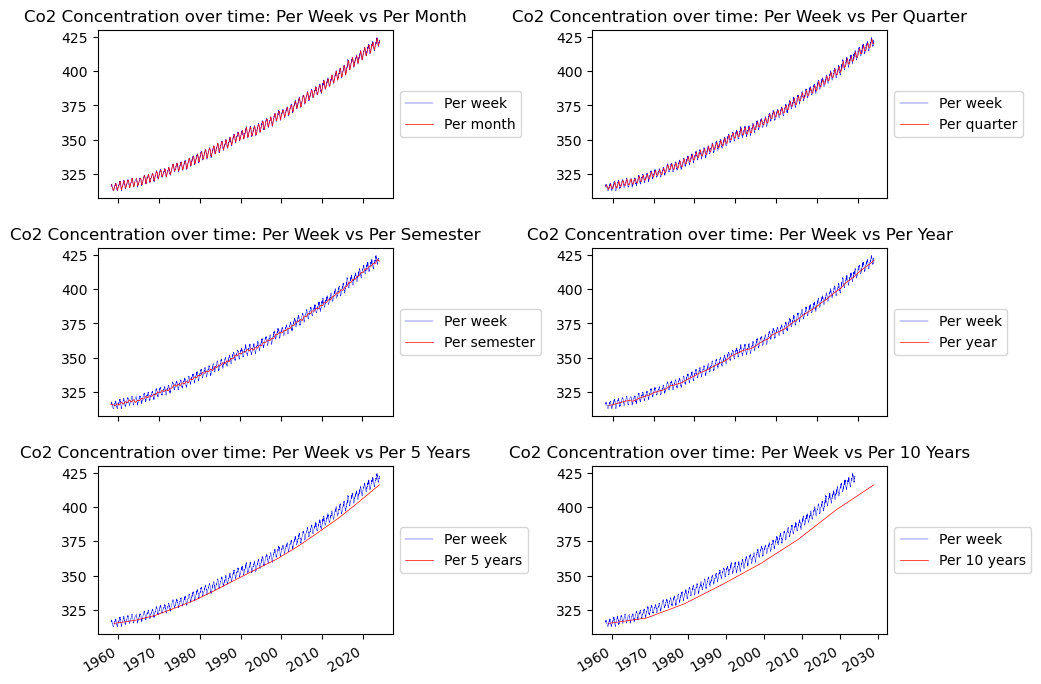

In [42]:
fig, axs = plt.subplots(3,2,figsize=(10.0, 8.0),sharex=False,sharey=False)
axs[0,0].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[0,0].plot(sorted_data.resample("M").mean().index,sorted_data.resample("M").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per month")
axs[0,0].set_title("Co2 Concentration over time: Per Week vs Per Month")

axs[0,1].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[0,1].plot(sorted_data.resample("3M").mean().index,sorted_data.resample("3M").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per quarter")
axs[0,1].set_title("Co2 Concentration over time: Per Week vs Per Quarter")

axs[1,0].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[1,0].plot(sorted_data.resample("6M").mean().index,sorted_data.resample("6M").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per semester")
axs[1,0].set_title("Co2 Concentration over time: Per Week vs Per Semester")

axs[1,1].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[1,1].plot(sorted_data.resample("Y").mean().index,sorted_data.resample("Y").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per year")
axs[1,1].set_title("Co2 Concentration over time: Per Week vs Per Year")

axs[2,0].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[2,0].plot(sorted_data.resample("5Y").mean().index,sorted_data.resample("5Y").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per 5 years")
axs[2,0].set_title("Co2 Concentration over time: Per Week vs Per 5 Years")

axs[2,1].plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.3,label="Per week")
axs[2,1].plot(sorted_data.resample("10Y").mean().index,sorted_data.resample("10Y").mean()["co2_concentration"],color='r',linewidth=0.5,label="Per 10 years")
axs[2,1].set_title("Co2 Concentration over time: Per Week vs Per 10 Years")

axs[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
fig.autofmt_xdate()
plt.show()

Viewing all those results and comparisons are telling us that if we want to build the best model that would fit best the CO2 Concentration evolution we have to look closer into how the frequency is build and avoid using grouping over per quarter. \
We are therefore creating a graph for a shorter period of 5 years to understand better how the values are evolving over time.

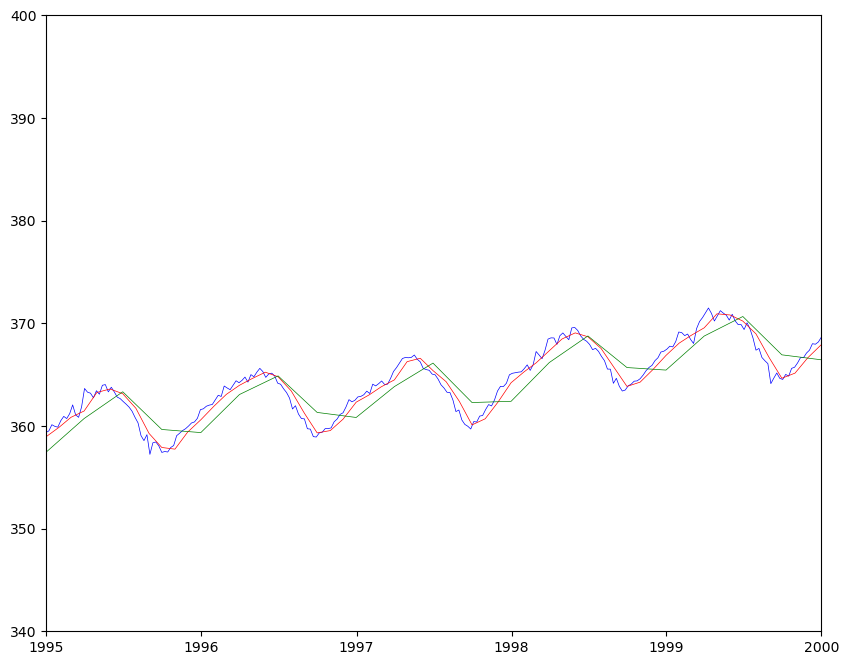

In [44]:
fig, ax = plt.subplots(figsize=(10.0, 8.0),sharex=False)
ax.plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.5)
ax.plot(sorted_data.resample("M").mean().index,sorted_data.resample("M").mean()["co2_concentration"],color='r',linewidth=0.5)
ax.plot(sorted_data.resample("3M").mean().index,sorted_data.resample("3M").mean()["co2_concentration"],color='g',linewidth=0.5)
ax.set_xlim([datetime.date(1995, 1, 1), datetime.date(2000, 1, 1)])
ax.set_ylim([340,400])

plt.show()

We can see first that there is monthly frequency that exist with a curve is at its top in the summer and bottom in September.
We are looking deeper into one month starting in February to be neither in a top or bottom position.

In [46]:
sorted_data.resample("M").mean().loc[datetime.date(1996, 2, 1): datetime.date(1997, 2, 1)]

,co2_concentration
date_index,
1996-02-29,363.0725
1996-03-31,363.9600
1996-04-30,364.6175
1996-05-31,365.2350
1996-06-30,364.7940
1996-07-31,363.4100
1996-08-31,361.2380
1996-09-30,359.3250
1996-10-31,359.5475


We are now exploring and trying to find manually a model that could be close to the real frequency.
We can see from the previous graph that the curve is a sinusoid and inspired by https://mathbitsnotebook.com/Algebra2/TrigGraphs/TGsinusoidal.html we have been exploring the data.

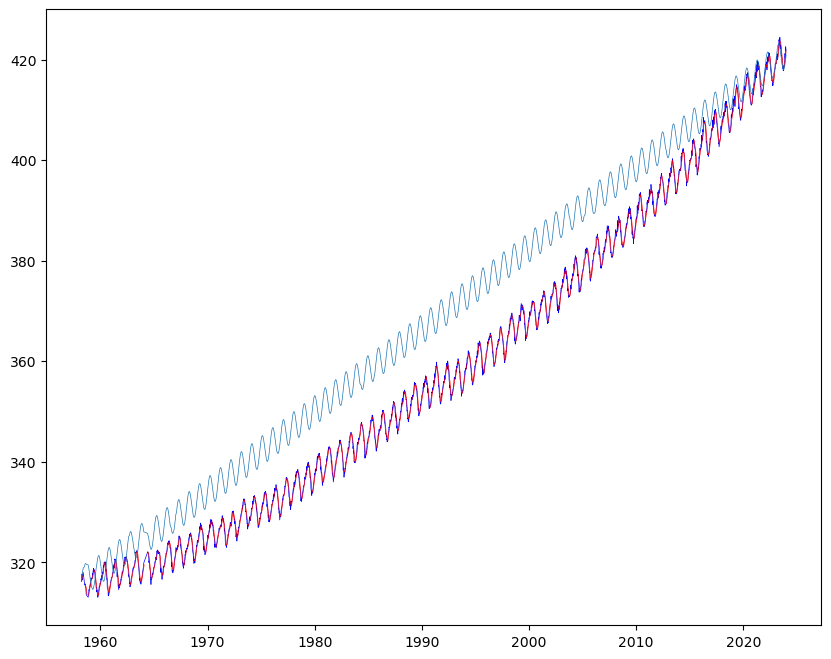

In [70]:
fig, ax = plt.subplots(figsize=(10.0, 8.0),sharex=False)
ax.plot(sorted_data.index,sorted_data["co2_concentration"],color='b',linewidth=0.5)
ax.plot(sorted_data.resample("M").mean().index,sorted_data.resample("M").mean()["co2_concentration"],color='r',linewidth=0.5)

# First we are calculating an amplitude over a month period: Average between the min and max / 2
amplitude = ((sorted_data.resample("M").mean().loc[datetime.date(1996, 2, 1): datetime.date(1997, 2, 1)].max()-\
sorted_data.resample("M").mean().loc[datetime.date(1996, 9, 1): datetime.date(1997, 9, 1)].min())/2).iloc[0]

# We define the initial offset that will be where the curve will begin 
offset = sorted_data.resample("M").mean().min().iloc[0] + amplitude

# We are creating the frequency based on the period
f = len(sorted_data.resample("Y").mean().index)
sample = len(sorted_data.index)
x = np.arange(sample)

# Playing with the numbers we can find a line following the same frequency having the same gradient.
y = amplitude*np.sin((2 * np.pi * f * x / sample)) + offset + x/32
ax.plot(sorted_data.index, y, linewidth=0.5)

plt.show()

The model that we have looked at is telling us that we are heading in the right direction exploring a sinusoidal curve.
Using the curve_fit function from the scipy package we can working in finding the best parameters to best fit the evolution of the CO2 concentration.


---------- to be continued --------